<a href="https://colab.research.google.com/github/GandharvaThite/Projects-ML-AI-NLP-/blob/main/RockVsMinePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
submarine_df = pd.read_csv('/content/Copy of sonar data.csv',header = None)

In [ ]:
submarine_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


## **Data Cleaning Process**

In [ ]:
submarine_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [ ]:
X = submarine_df.drop(columns=60,axis=1)
Y = submarine_df[60]

# **Visualizing the target feature**

<BarContainer object of 2 artists>

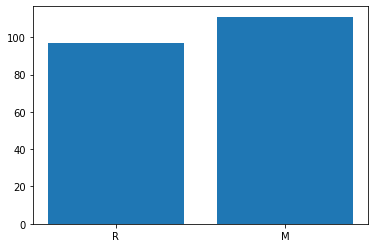

In [ ]:
set_Y = [0,0]
uni_Y = ['R','M']
for i in range(len(Y)):
  if(Y[i]=='R'):
    set_Y[0]+=1
  else:
    set_Y[1]+=1
plt.bar(uni_Y,set_Y)

# **Training and checking for various models**

In [ ]:
# for i in range(len(Y)):
#   if(Y[i]=='R'):
#     Y[i] = 0

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,stratify = Y,random_state = 1)

In [ ]:
model_params = {
   'svm':{
   'model':svm.SVC(gamma='auto'),
   'params':{
       'C':[1,10,20],
       'kernel':['linear','poly','rbf']

   }
},
  'random_forest':{
       'model':RandomForestClassifier(),
       'params':{
           'n_estimators':[1,5,10]
       }
   },
   'logistic_regression':{
       'model':LogisticRegression(solver = 'liblinear',multi_class='auto'),
       'params':{
           'C':[1,5,10]
       }
   },
   'decision_tree':{
       'model':tree.DecisionTreeClassifier(),
       'params':{
           'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random']
       }
   },
    }

In [ ]:
scores = []
for model_name,mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv =5,return_train_score=False)
  clf.fit(X,Y)
  scores.append({
      'model_name':model_name,
      'best_score':clf.best_score_,
      'best_parameters':clf.best_params_
  }
  )

In [ ]:
scores

[{'model_name': 'svm',
  'best_score': 0.659349593495935,
  'best_parameters': {'C': 10, 'kernel': 'linear'}},
 {'model_name': 'random_forest',
  'best_score': 0.6687572590011615,
  'best_parameters': {'n_estimators': 10}},
 {'model_name': 'logistic_regression',
  'best_score': 0.6206736353077816,
  'best_parameters': {'C': 1}},
 {'model_name': 'decision_tree',
  'best_score': 0.648896631823461,
  'best_parameters': {'criterion': 'entropy', 'splitter': 'best'}}]

In [ ]:
# model = RandomForestClassifier(n_estimators = 10)
model = svm.SVC()
# model = tree.DecisionTreeClassifier(criterion = 'gini',splitter = 'random')
# model = LogisticRegression()
model.fit(X_train,Y_train)

SVC()

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
ml_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
ml_accuracy

0.8823529411764706

In [ ]:
Y_p = model.predict(X_test)
accuracy_score(Y_p,Y_test)

0.8095238095238095

# **Analyzing accuracy metrics for the model**

In [ ]:
cm = confusion_matrix(Y_test,Y_p)

In [ ]:
cm

array([[10,  1],
       [ 3,  7]])

Text(33.0, 0.5, 'actual')

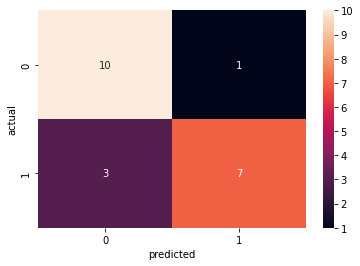

In [ ]:
sn.heatmap(cm,annot =True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [ ]:
Y_test_arr = np.asarray(Y_test)
Y_test_arr1 = np.asarray(Y_p)

In [ ]:
for i in range(len(Y_test_arr)):
  if(Y_test_arr[i]=='M'):
    Y_test_arr[i] = 0
  if(Y_test_arr[i]=='R'):
    Y_test_arr[i] = 1
for i in range(len(Y_test_arr1)):
  if(Y_test_arr1[i]=='M'):
    Y_test_arr1[i] = 0
  else:
    Y_test_arr1[i] = 1

In [ ]:
Y_test_arr

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=object)

In [ ]:
Y_test_arr1

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=object)

In [ ]:
true_pos = 0
for i in range(len(Y_test_arr1)):
  if(Y_test_arr1[i] == 1 and Y_test_arr[i]==1):
    true_pos+=1
false_pos = 0
for i in range(len(Y_test_arr1)):
  if(Y_test_arr1[i] == 1 and Y_test_arr[i]!=1):
    false_pos+=1
true_neg = 0
for i in range(len(Y_test_arr1)):
  if(Y_test_arr1[i] == 0 and Y_test_arr[i]==0):
    true_neg+=1

cnt=0
for i in range(len(Y_test_arr1)):
  if(Y_test_arr1[i] == 0):
    cnt+=1
false_neg = cnt-true_neg
true_pos,false_pos,true_neg,false_neg

(7, 1, 10, 3)

In [ ]:
all = true_pos+true_neg+false_pos+false_neg
accuracy_pre = (true_pos+true_neg)/all
error_rate = 1-accuracy_pre
precision=true_pos/(true_pos+false_pos)
recall = true_pos/(true_pos+false_neg)
f1_score = 2*(precision*recall)/(precision+recall)

In [ ]:
print("Accuracy: ",accuracy_pre)
print("Error Rate: ",error_rate)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1_score)

Accuracy:  0.8095238095238095
Error Rate:  0.19047619047619047
Precision:  0.875
Recall:  0.7
F1 Score:  0.7777777777777777


# **Testing the model for random values**

In [ ]:
input_data = (0.1150,0.1163,0.0866,0.0358,0.0232,0.1267,0.2417,0.2661,0.4346,0.5378,0.3816,0.0991,0.0616,0.1795,0.3907,0.3602,0.3041,0.2428,0.4060,0.8395,0.9777,0.4680,0.0610,0.2143,0.1348,0.2854,0.1617,0.2649,0.4565,0.6502,0.2848,0.3296,0.5370,0.6627,0.8626,0.8547,0.7848,0.9016,0.8827,0.6086,0.2810,0.0906,0.1177,0.2694,0.5214,0.4232,0.2340,0.1928,0.1092,0.0507,0.0228,0.0099,0.0065,0.0085,0.0166,0.0110,0.0190,0.0141,0.0068,0.0086)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if(prediction[0] == 'R'):
  print("A rock is detected")
else:
  print("A mine is detected")

A mine is detected
